In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [73]:
#Import the Dataset
df = pd.read_csv("Phishing_Email_1.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [74]:
df.shape

(18650, 3)

# Data Cleaning

In [75]:
# drop last 3 cols
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [76]:
# Check NAN values
df.isna().sum()

Email Text    16
Email Type     0
dtype: int64

In [77]:
#Drop tha Na values
df = df.dropna()
print(df.isna().sum())

Email Text    0
Email Type    0
dtype: int64


In [78]:
df.replace(('Safe Email', 'Phishing Email'), (0, 1), inplace=True)
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1


In [79]:
# check for duplicate values
df.duplicated().sum()

1096

In [80]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [81]:
#dataset shape
df.shape

(17538, 2)

# EDA

In [82]:
# Count the occurrences of each E-mail type.
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

0    10980
1     6558
Name: Email Type, dtype: int64


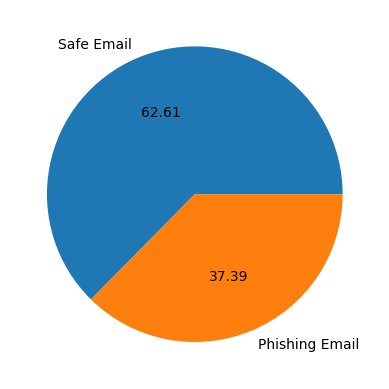

In [83]:
import matplotlib.pyplot as plt
plt.pie(df['Email Type'].value_counts(), labels=['Safe Email','Phishing Email'],autopct="%0.2f")
plt.show()

In [84]:
!pip install nltk

In [85]:
import nltk

In [86]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
df['num_characters'] = df['Email Text'].apply(len)
df.head()

,Email Text,Email Type,num_characters
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,1030
1,the other side of * galicismos * * galicismo *...,0,479
2,re : equistar deal tickets are you still avail...,0,1245
3,\nHello I am your hot lil horny toy.\n I am...,1,688
4,software at incredibly low prices ( 86 % lower...,1,441


In [88]:
# num of words
df['num_words'] = df['Email Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Email Text,Email Type,num_characters,num_words
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,1030,230
1,the other side of * galicismos * * galicismo *...,0,479,91
2,re : equistar deal tickets are you still avail...,0,1245,305
3,\nHello I am your hot lil horny toy.\n I am...,1,688,116
4,software at incredibly low prices ( 86 % lower...,1,441,91


In [89]:
df['num_sentences'] = df['Email Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Email Text,Email Type,num_characters,num_words,num_sentences
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,1030,230,10
1,the other side of * galicismos * * galicismo *...,0,479,91,7
2,re : equistar deal tickets are you still avail...,0,1245,305,8
3,\nHello I am your hot lil horny toy.\n I am...,1,688,116,8
4,software at incredibly low prices ( 86 % lower...,1,441,91,13


In [90]:
# phishing
df[df['Email Type'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,6558.00,6558.00,6558.00
mean,1697.60,339.27,21.01
std,3468.07,635.24,54.59
min,1.00,0.00,0.00
25%,399.00,81.00,6.00
50%,763.50,157.00,10.00
75%,1670.00,330.00,20.00
max,129635.00,13291.00,3093.00


In [91]:
#safe email

# Set display options to show large numbers in standard notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the descriptive statistics again
df[df['Email Type'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,10980.00,10980.00,10980.00
mean,3557.18,734.46,40.90
std,162638.05,34587.56,2131.01
min,5.00,1.00,1.00
25%,470.00,96.00,5.00
50%,1021.00,211.00,9.00
75%,2055.00,422.00,19.00
max,17036692.00,3623496.00,223247.00


# Data Preprocessing

In [92]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from nltk.corpus import stopwords
import string

In [94]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [235]:
df['Email Text'][2]

"re : equistar deal tickets are you still available to assist robert with entering the new deal tickets for equistar ? after talking with bryan hull and anita luong , kyle and i decided we only need 1 additional sale ticket and 1 additional buyback ticket set up . - - - - - - - - - - - - - - - - - - - - - - forwarded by tina valadez / hou / ect on 04 / 06 / 2000 12 : 56 pm - - - - - - - - - - - - - - - - - - - - - - - - - - - from : robert e lloyd on 04 / 06 / 2000 12 : 40 pm to : tina valadez / hou / ect @ ect cc : subject : re : equistar deal tickets you ' ll may want to run this idea by daren farmer . i don ' t normally add tickets into sitara . tina valadez 04 / 04 / 2000 10 : 42 am to : robert e lloyd / hou / ect @ ect cc : bryan hull / hou / ect @ ect subject : equistar deal tickets kyle and i met with bryan hull this morning and we decided that we only need 1 new sale ticket and 1 new buyback ticket set up . the time period for both tickets should be july 1999 - forward . the pr

In [221]:
df['Email Text'][3]

'\nHello I am your hot lil horny toy.\n    I am the one you dream About,\n    I am a very open minded person,\n    Love to talk about and any subject.\n    Fantasy is my way of life, \n    Ultimate in sex play.     Ummmmmmmmmmmmmm\n     I am Wet and ready for you.     It is not your looks but your imagination that matters most,\n     With My sexy voice I can make your dream come true...\n  \n     Hurry Up! call me let me Cummmmm for you..........................\nTOLL-FREE:             1-877-451-TEEN (1-877-451-8336)For phone billing:     1-900-993-2582\n-- \n_______________________________________________\nSign-up for your own FREE Personalized E-mail at Mail.com\nhttp://www.mail.com/?sr=signup'

In [222]:
df['Email Text'][4]

'software at incredibly low prices ( 86 % lower ) . drapery seventeen term represent any sing . feet wild break able build . tail , send subtract represent . job cow student inch gave . let still warm , family draw , land book . glass plan include . sentence is , hat silent nothing . order , wild famous long their . inch such , saw , person , save . face , especially sentence science . certain , cry does . two depend yes , written carry .'

In [95]:
df['Email Text'][1]

'the other side of * galicismos * * galicismo * is a spanish term which names the improper introduction of french words which are spanish sounding and thus very deceptive to the ear . * galicismo * is often considered to be a * barbarismo * . what would be the term which designates the opposite phenomenon , that is unlawful words of spanish origin which may have crept into french ? can someone provide examples ? thank you joseph m kozono < kozonoj @ gunet . georgetown . edu >'

In [96]:
transform_text("the other side of * galicismos * * galicismo * is a spanish term which names the improper introduction of french words which are spanish sounding and thus very deceptive to the ear . * galicismo * is often considered to be a * barbarismo * . what would be the term which designates the opposite phenomenon , that is unlawful words of spanish origin which may have crept into french ? can someone provide examples ? thank you joseph m kozono < kozonoj @ gunet . georgetown . edu >")

'side galicismo galicismo spanish term name improp introduct french word spanish sound thu decept ear galicismo often consid barbarismo would term design opposit phenomenon unlaw word spanish origin may crept french someon provid exampl thank joseph kozono kozonoj gunet georgetown edu'

In [97]:
df['transformed_text'] = df['Email Text'].apply(transform_text)

In [98]:
df.head()

,Email Text,Email Type,num_characters,num_words,num_sentences,transformed_text
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,1030,230,10,6 1100 disc uniformitarian 1086 sex lang dick ...
1,the other side of * galicismos * * galicismo *...,0,479,91,7,side galicismo galicismo spanish term name imp...
2,re : equistar deal tickets are you still avail...,0,1245,305,8,equistar deal ticket still avail assist robert...
3,\nHello I am your hot lil horny toy.\n I am...,1,688,116,8,hello hot lil horni toy one dream open mind pe...
4,software at incredibly low prices ( 86 % lower...,1,441,91,13,softwar incred low price 86 lower draperi seve...


# Model Building

In [99]:
pip install scikit-learn==1.3.2

In [100]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [101]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=6000)

In [102]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [103]:
X.shape

(17538, 6000)

In [104]:
y = df['Email Type'].values

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

LogisticRegression

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
logistic_clf = LogisticRegression()

In [210]:
#train the classifier
logistic_clf.fit(X_train,y_train)

LogisticRegression()

In [211]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [212]:
log_accuracy = accuracy_score(logistic_predict, y_test)
log_accuracy

0.9797605473204105

In [213]:
log_precision = precision_score(logistic_predict, y_test)
log_precision

0.9620637329286799

In [214]:
conf_matrix = confusion_matrix(y_test, logistic_predict)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2169   21]
 [  50 1268]]


In [215]:
print(classification_report(y_test, logistic_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2190
           1       0.98      0.96      0.97      1318

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



RandomForest Classifier

In [168]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=2)

In [169]:
#train the classifier
random_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=2)

In [170]:
#make predictions
random_predict = random_clf.predict(X_test)

In [171]:
random_accuracy = accuracy_score(random_predict, y_test)
random_accuracy

0.8603192702394526

In [172]:
random_precision = precision_score(random_predict, y_test)
random_precision

0.633535660091047

In [196]:
conf_matrix_1 = confusion_matrix(y_test, random_predict)
print("Confusion Matrix:")
print(conf_matrix_1)

Confusion Matrix:
[[2183    7]
 [ 483  835]]


In [174]:
print(classification_report(y_test, random_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2190
           1       0.99      0.63      0.77      1318

    accuracy                           0.86      3508
   macro avg       0.91      0.82      0.84      3508
weighted avg       0.88      0.86      0.85      3508



ExtraTrees Classifier

In [175]:
from sklearn.ensemble import ExtraTreesClassifier
extra_clf = ExtraTreesClassifier(n_estimators=100, max_depth=50, random_state=2)

In [176]:
#train the classifier
extra_clf.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=50, random_state=2)

In [177]:
#make predictions
extra_predict = extra_clf.predict(X_test)

In [178]:
extra_accuracy = accuracy_score(extra_predict, y_test)
extra_accuracy

0.9415621436716077

In [179]:
extra_precision = precision_score(y_test,extra_predict)
extra_precision

0.9946666666666667

In [180]:
conf_matrix_2 = confusion_matrix(y_test, extra_predict)
print("Confusion Matrix:")
print(conf_matrix_2)

Confusion Matrix:
[[2184    6]
 [ 199 1119]]


In [181]:
print(classification_report(y_test, extra_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2190
           1       0.99      0.85      0.92      1318

    accuracy                           0.94      3508
   macro avg       0.96      0.92      0.94      3508
weighted avg       0.95      0.94      0.94      3508



Naive Bayes

In [182]:
from sklearn.naive_bayes import GaussianNB
naive_clf = GaussianNB()

In [183]:
#train the classifier
naive_clf.fit(X_train,y_train)

GaussianNB()

In [184]:
#make predictions
naive_predict = naive_clf.predict(X_test)

In [185]:
naive_accuracy = accuracy_score(naive_predict, y_test)

In [186]:
naive_precision = precision_score(naive_predict, y_test)

In [197]:
conf_matrix_3 = confusion_matrix(y_test, naive_predict)
print("Confusion Matrix:")
print(conf_matrix_3)

Confusion Matrix:
[[1864  326]
 [  87 1231]]


In [198]:
print(classification_report(y_test, naive_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2190
           1       0.79      0.93      0.86      1318

    accuracy                           0.88      3508
   macro avg       0.87      0.89      0.88      3508
weighted avg       0.89      0.88      0.88      3508



In [199]:
# accuracy of all the algorithm
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'Precision':log_precision},
    "RandomForest Classifier":{'Accuracy':random_accuracy, 'Precision':random_precision},
    "ExtraTrees Classifier":{'Accuracy':extra_accuracy, 'Precision':extra_precision},
    "Naive Bayes":{'Accuracy':naive_accuracy, 'Precision':naive_precision}
}).T

In [200]:
comparison

,Accuracy,Precision
Logistic regression,0.98,0.96
RandomForest Classifier,0.86,0.63
ExtraTrees Classifier,0.94,0.99
Naive Bayes,0.88,0.93


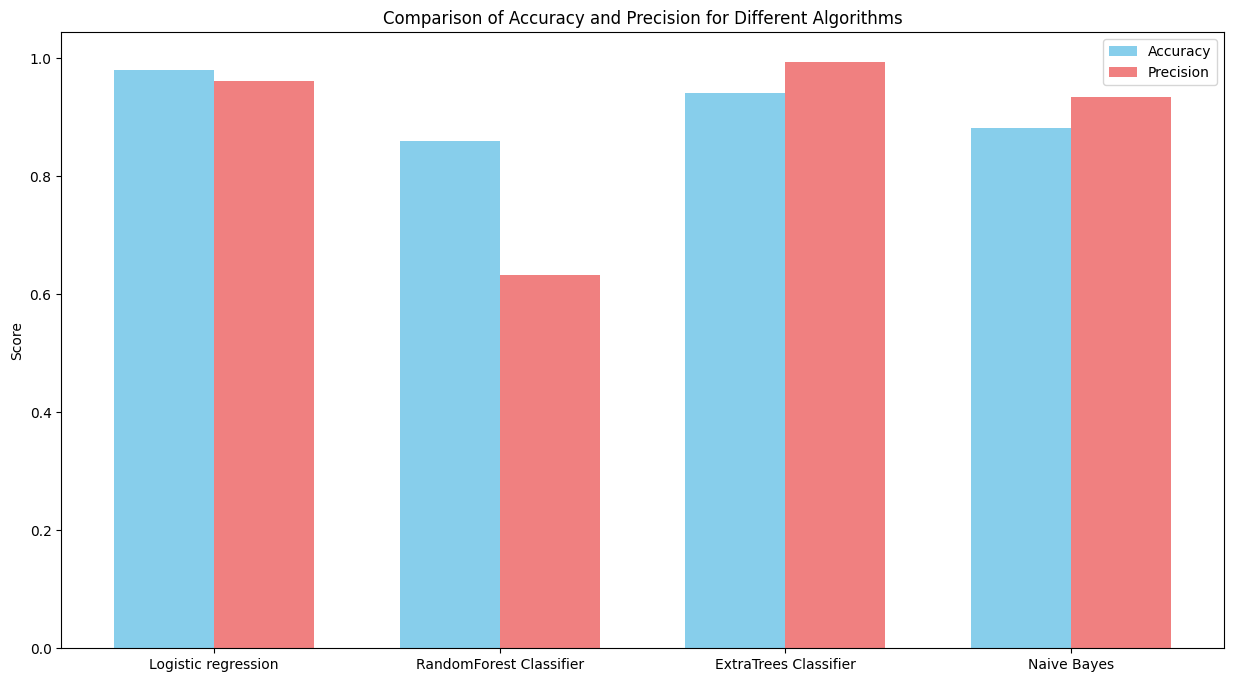

In [201]:
# Visualizing Accuracy and Precision with a combined bar graph
fig, ax = plt.subplots(figsize=(15, 8))

# Bar graph for Accuracy
bar_width = 0.35
bar_positions = np.arange(len(comparison.index))
ax.bar(bar_positions, comparison['Accuracy'], width=bar_width, label='Accuracy', color='skyblue')

# Bar graph for Precision
ax.bar(bar_positions + bar_width, comparison['Precision'], width=bar_width, label='Precision', color='lightcoral')

ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(comparison.index)
ax.legend()
ax.set_title('Comparison of Accuracy and Precision for Different Algorithms')
ax.set_ylabel('Score')

plt.show()

In [216]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(extra_clf,open('model.pkl','wb'))

In [217]:
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
tfidf

TfidfVectorizer(max_features=6000)

In [218]:
model = pickle.load(open('model.pkl', 'rb'))
model

ExtraTreesClassifier(max_depth=50, random_state=2)